<a href="https://colab.research.google.com/github/iamajarpit/nude_image_detection/blob/main/nude_detection_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
train_dir = '/content/drive/MyDrive/AdultContents.v17-adultcontentsv8_post_demo.tensorflow (1)/NUDE_IMAGE_DETECTION/train'
validation_dir = '/content/drive/MyDrive/AdultContents.v17-adultcontentsv8_post_demo.tensorflow (1)/NUDE_IMAGE_DETECTION/valid'


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import os


In [ ]:
# ImageDataGenerator for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# ImageDataGenerator for validation
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


Found 18409 images belonging to 2 classes.
Found 1757 images belonging to 2 classes.


In [ ]:
# Load the MobileNetV2 model without the top layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully-connected layer
x = Dense(1024, activation='relu')(x)

# Add a logistic layer for binary classification
predictions = Dense(1, activation='sigmoid')(x)

# Combine the base model with the new layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = validation_generator.samples // validation_generator.batch_size

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    epochs=10
)


Epoch 1/10
575/575 [==============================] - 5950s 10s/step - loss: 0.0761 - accuracy: 0.9728 - val_loss: 0.0489 - val_accuracy: 0.9867
Epoch 2/10
575/575 [==============================] - 1209s 2s/step - loss: 0.0507 - accuracy: 0.9825 - val_loss: 0.0920 - val_accuracy: 0.9659
Epoch 3/10
575/575 [==============================] - 1238s 2s/step - loss: 0.0452 - accuracy: 0.9835 - val_loss: 0.0407 - val_accuracy: 0.9873
Epoch 4/10
575/575 [==============================] - 1291s 2s/step - loss: 0.0397 - accuracy: 0.9851 - val_loss: 0.0437 - val_accuracy: 0.9844
Epoch 5/10
575/575 [==============================] - 1237s 2s/step - loss: 0.0370 - accuracy: 0.9864 - val_loss: 0.0457 - val_accuracy: 0.9826
Epoch 6/10
575/575 [==============================] - 1292s 2s/step - loss: 0.0354 - accuracy: 0.9874 - val_loss: 0.0372 - val_accuracy: 0.9855
Epoch 7/10
575/575 [==============================] - 1313s 2s/step - loss: 0.0348 - accuracy: 0.9880 - val_loss: 0.0495 - val_accuracy

In [ ]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation accuracy: {accuracy * 100:.2f}%')

model.save('nude_image_detector.h5')


55/55 [==============================] - 91s 2s/step - loss: 0.0539 - accuracy: 0.9812
Validation accuracy: 98.12%


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


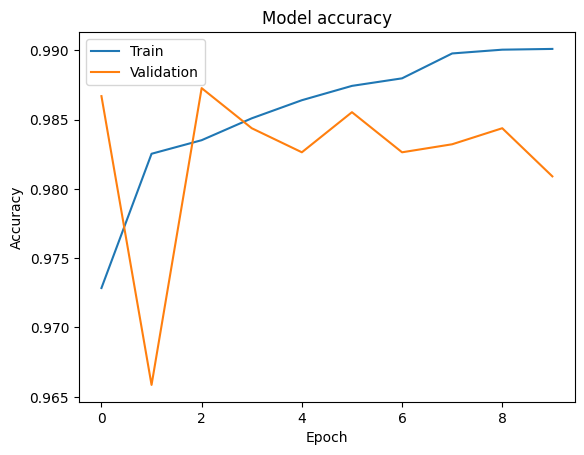

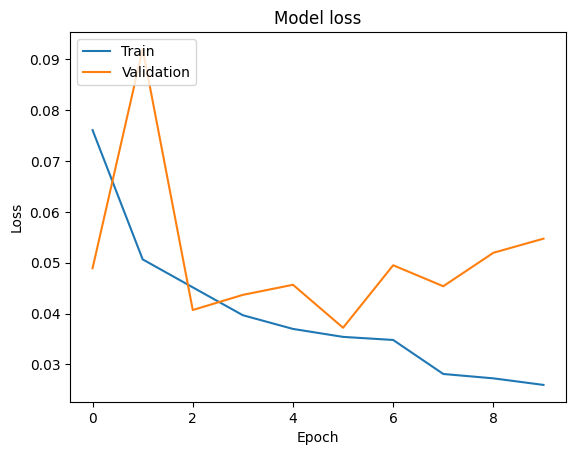

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
!pip install flask-ngrok
from flask import Flask, request, render_template
from flask_ngrok import run_with_ngrok
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

app = Flask(__name__)
run_with_ngrok(app)  # Start ngrok when app is run

model = load_model('nude_image_detector.h5')


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(model, img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    if prediction[0] > 0.3:
        print(f"{img_path} is a nude image")
    else:
        print(f"{img_path} is not a nude image")

# Example usage
predict_image(model, '/content/drive/MyDrive/AdultContents.v17-adultcontentsv8_post_demo.tensorflow (1)/test/train3-45-_jpg.rf.34877c1b2f0fd9c48cb0b4176d94a1aa.jpg')

1/1 [==============================] - 0s 52ms/step
/content/drive/MyDrive/AdultContents.v17-adultcontentsv8_post_demo.tensorflow (1)/test/train3-45-_jpg.rf.34877c1b2f0fd9c48cb0b4176d94a1aa.jpg is not a nude image


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the model
model_path = '/content/nude_image_detector.h5'  # Update this path to your saved model location
model = load_model(model_path)

# Function to predict if an image is nude or not
def predict_image(model, img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    if prediction[0] > 0.3:
        return f"{img_path} is a nude image"
    else:
        return f"{img_path} is not a nude image"

# Example usage with a placeholder path
test_image_path = '/content/drive/MyDrive/AdultContents.v17-adultcontentsv8_post_demo.tensorflow (1)/NUDE_IMAGE_DETECTION/test/train3-452-_jpg.rf.5a9fb5ede95136fc427ebb4222154fb5.jpg'  # Update this path to your test image location
print(predict_image(model, test_image_path))


1/1 [==============================] - 1s 1s/step
/content/drive/MyDrive/AdultContents.v17-adultcontentsv8_post_demo.tensorflow (1)/NUDE_IMAGE_DETECTION/test/train3-452-_jpg.rf.5a9fb5ede95136fc427ebb4222154fb5.jpg is a nude image


In [ ]:
!pip show tensorflow



Name: tensorflow
Version: 2.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras
